# Simple example of G3tHWP

G3tHWP outputs HWP angle synchronized to IRIG time.

In [1]:
from g3thwp import G3tHWP
import sotodlib.io.load_smurf as load_smurf
import matplotlib.pyplot as plt
import scipy.interpolate

In [2]:
#archive_path = '/path/to/data/hk/'
archive_path = '/mnt/SOdata/pton-tsat/hk/'
HWP = G3tHWP(archive_path)
time, angle =  HWP.load_data(1643342328.5296934, 1643342929.6901855)

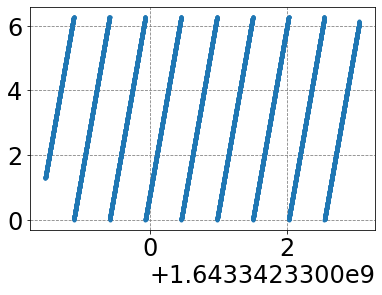

In [4]:
plt.plot(time[:10000],angle[:10000],'.')

# Example of linear interpolation between IRIG and SMuRF timing

**HWP spinning at around 2Hz** <br>
/pton-rd/timestreams/16433/crate1slot4/1643342329_000.g3 <br>
/pton-rd/timestreams/16433/crate1slot4/1643342329_001.g3

In [24]:
#archive_path = '/path/to/data/timestream/'
archive_path = '/mnt/SOdata/pton-rd/timestreams/16433/crate1slot4'
g3_data = load_smurf.load_file([   
    archive_path + '/1643342329_000.g3',
    archive_path + '/1643342329_001.g3',
])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:06<00:00,  3.49s/it]


In [25]:
smurf_timestamp = g3_data.timestamps

In [26]:
smurf_angle = scipy.interpolate.interp1d(time, angle, kind='linear',fill_value='extrapolate')(smurf_timestamp)

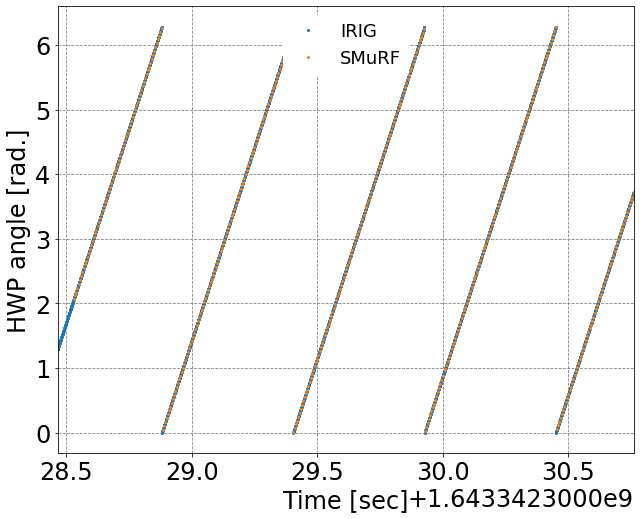

In [37]:
n = 5000
plt.figure(figsize=(10,8))
plt.xlabel('Time [sec]')
plt.ylabel('HWP angle [rad.]')
plt.plot(time, angle, '.',markersize=4, label='IRIG')
plt.plot(smurf_timestamp, smurf_angle, '.', markersize=4, label ='SMuRF')
plt.xlim(time[0],time[n])
plt.legend()
plt.show()